In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")

In [4]:
# Importing the dataset
dataset = pd.read_csv('../Data/train_titanic.csv')
dataset = dataset[dataset['Age'].notnull()]
cat_cols = ['Sex' ]
dataset = pd.get_dummies(dataset, columns = cat_cols)
X = dataset[['Pclass','Age','Sex_male']].values
y = dataset['Survived'].values

In [3]:
# Splitting the dataset into the Training set and Test set
# Kaggle gives us a test set, but for this example we'd rather split it ourselves so we can visualize what the model is doing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm

[[87 16]
 [17 59]]


In [8]:
# Decision Plane

x_surf = np.linspace(np.min(X_test[:,0]), np.max(X_test[:,0]), 10)                # generate a mesh
y_surf = np.linspace(np.min(X_test[:,1]), np.max(X_test[:,1]),10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z_surf = -(classifier.intercept_ + classifier.coef_[0][0]*x_surf + classifier.coef_[0][1]*y_surf)/classifier.coef_[0][2]



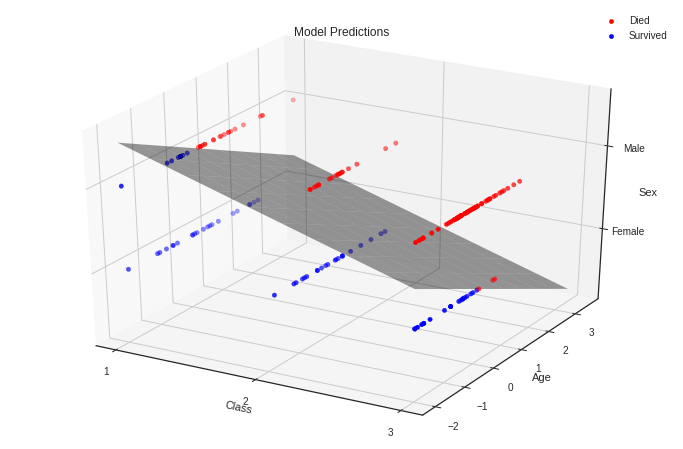

In [15]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

died = np.where(y_pred==0)[0]
survived = np.where(y_pred==1)[0]

p=ax.scatter(xs = X_test[died,0], ys =X_test[died,1], zs=X_test[died,2], 
             zdir='z', s=20, c='red',label = 'Died')
p=ax.scatter(xs = X_test[survived,0], ys =X_test[survived,1], zs=X_test[survived,2], 
             zdir='z', s=20, c='blue',label = 'Survived')

ax.set_xlabel('Class')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
ax.legend()
ax.set_title('Model Predictions')
ax.zaxis.set_ticks(np.unique(X_test[:,2]))
ax.zaxis.set_ticklabels(['Female','Male'])

ax.xaxis.set_ticks(np.unique(X_test[:,0]))
ax.xaxis.set_ticklabels(['1','2','3'])

ax.plot_surface(x_surf, y_surf,
                z_surf,
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()

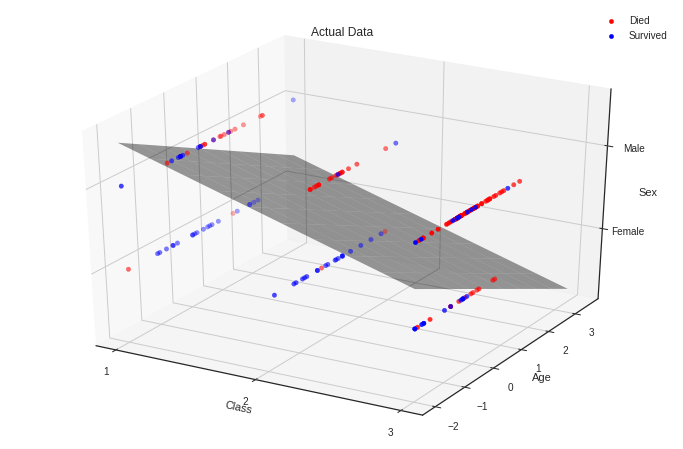

In [16]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

died = np.where(y_test==0)[0]
survived = np.where(y_test==1)[0]

p=ax.scatter(xs = X_test[died,0], ys =X_test[died,1], zs=X_test[died,2], 
             zdir='z', s=20, c='red',label = 'Died')
p=ax.scatter(xs = X_test[survived,0], ys =X_test[survived,1], zs=X_test[survived,2], 
             zdir='z', s=20, c='blue',label = 'Survived')

ax.set_xlabel('Class')
ax.set_ylabel('Age')
ax.set_zlabel('Sex')
ax.legend()
ax.set_title('Actual Data')
ax.zaxis.set_ticks(np.unique(X_test[:,2]))
ax.zaxis.set_ticklabels(['Female','Male'])

ax.xaxis.set_ticks(np.unique(X_test[:,0]))
ax.xaxis.set_ticklabels(['1','2','3'])

ax.plot_surface(x_surf, y_surf,
                z_surf,
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()